> # *Crop Recommendation Analysis*

## Import Modules required

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

## Data Overview

In [2]:
# load dataset and take overview

dataset = pd.read_csv("../Datasets/Crop_Recommendation_Dataset.csv")
dataset.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
# View basic information related to dataset 

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


## Data Cleaning

In [4]:
# find count of duplicate rows

dataset.duplicated().sum()

0

In [5]:
# count of null values in every column

col = dataset.columns
col = list(col)
for j in col:
    print(f"{j} => {dataset[j].isnull().sum()}")

N => 0
P => 0
K => 0
temperature => 0
humidity => 0
ph => 0
rainfall => 0
label => 0


## Data Exploration And Visualization

In [6]:
# View columns present

list(dataset.columns)

['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']

In [7]:
# Find crops that are present as label

unique_crops =  dataset['label'].unique()
unique_crops = list(unique_crops)

unique_crops


['rice',
 'maize',
 'chickpea',
 'kidneybeans',
 'pigeonpeas',
 'mothbeans',
 'mungbean',
 'blackgram',
 'lentil',
 'pomegranate',
 'banana',
 'mango',
 'grapes',
 'watermelon',
 'muskmelon',
 'apple',
 'orange',
 'papaya',
 'coconut',
 'cotton',
 'jute',
 'coffee']

In [8]:
# Find count of datapoints for every crop

dataset['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

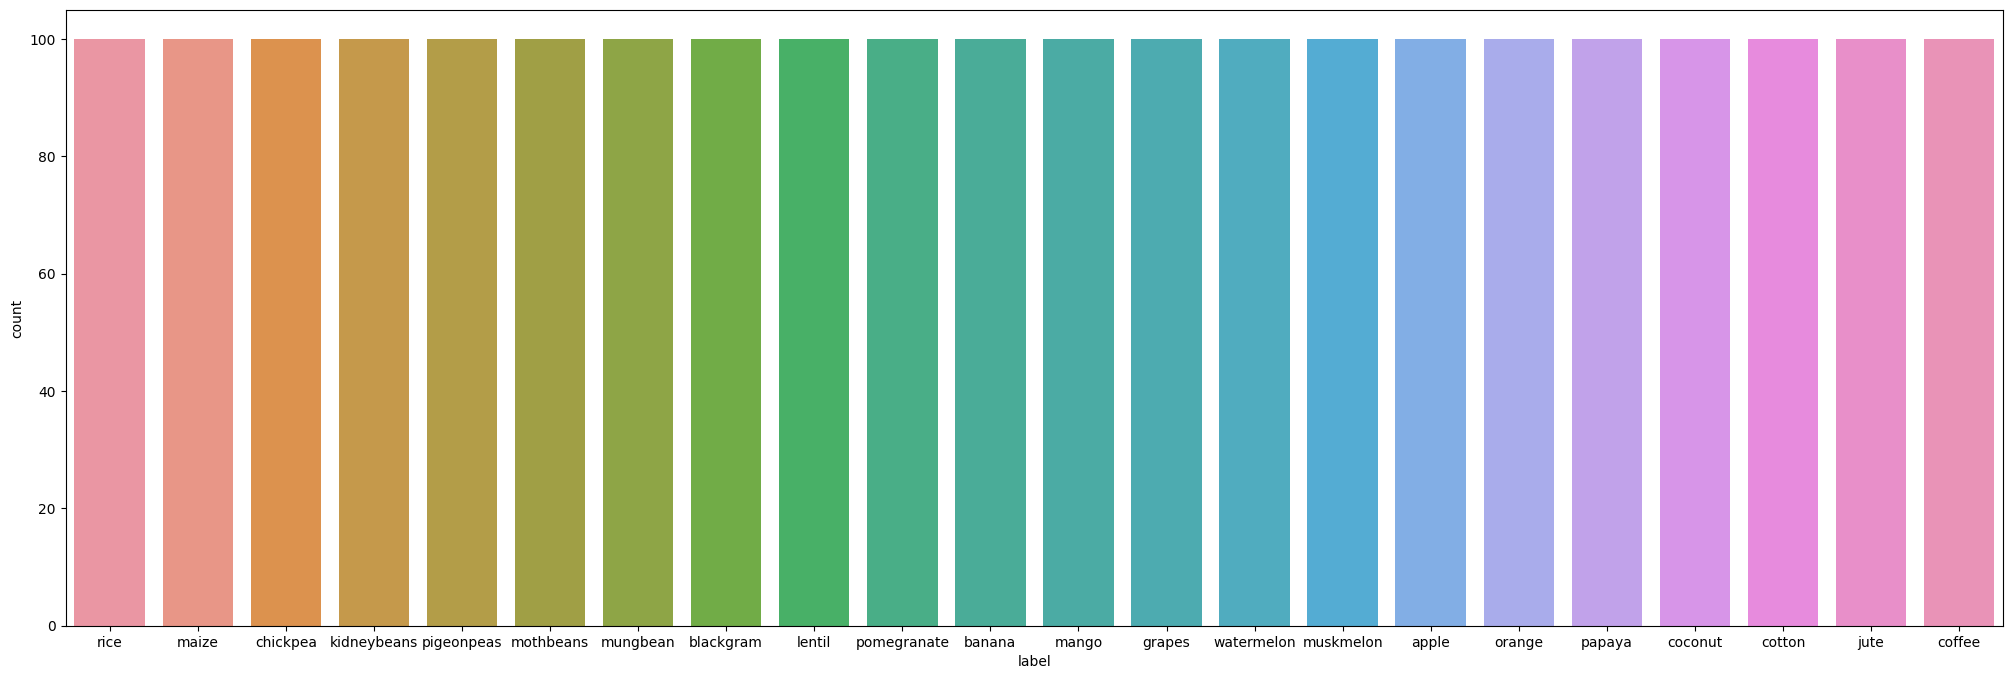

In [9]:
# plot counts of crop

plt.figure(figsize=(25,8))

sns.countplot(data=dataset,x='label')

<Axes: xlabel='Nitrogen', ylabel='Crop'>

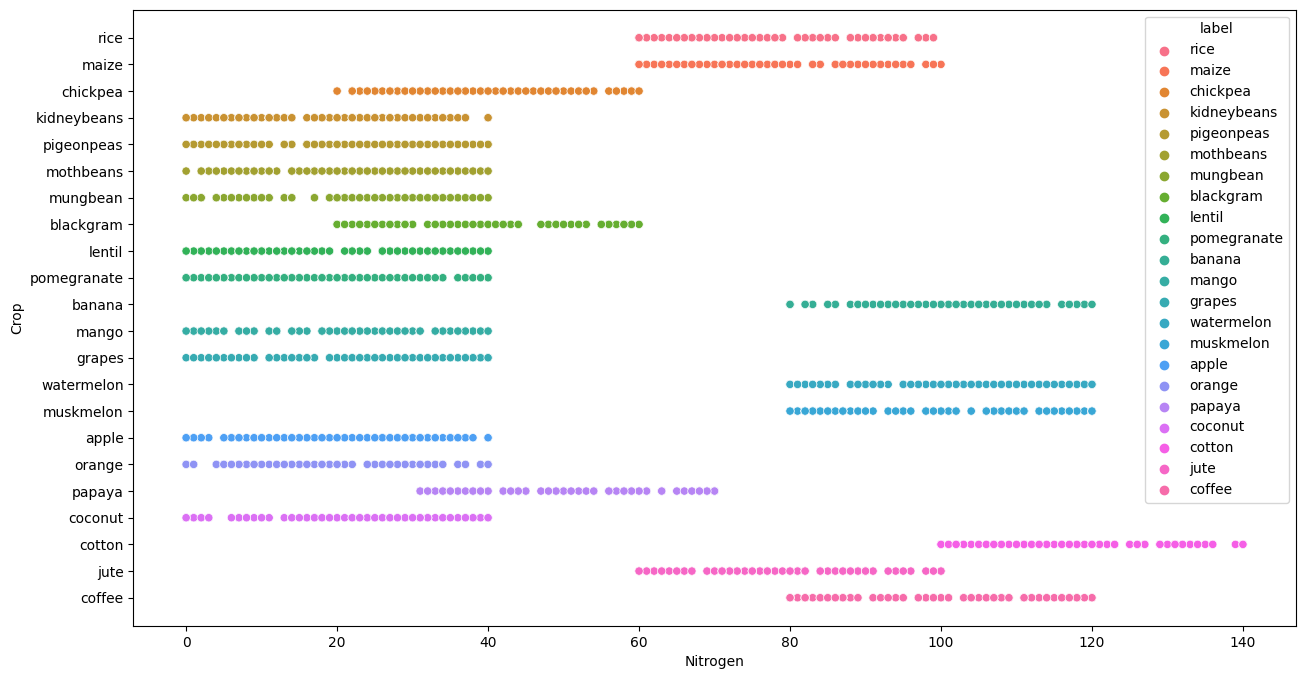

In [10]:
# effect of Nitrogen on crop

plt.figure(figsize=(15,8))
plt.axes(xlabel="Nitrogen", ylabel="Crop")
sns.scatterplot(data=dataset, x='N', y='label', hue='label')

<Axes: xlabel='Phosphorus', ylabel='Crop'>

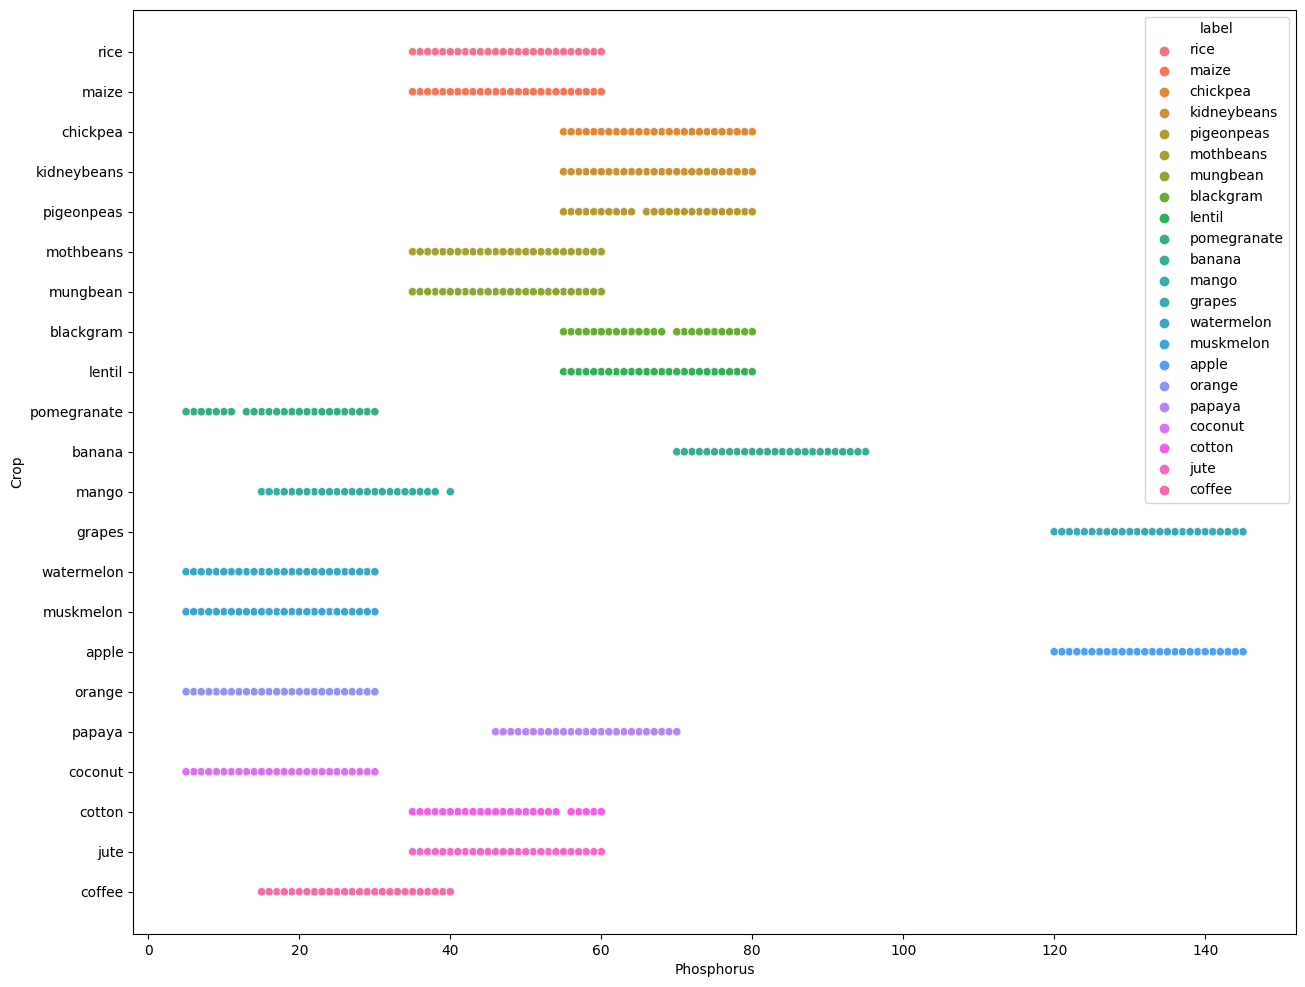

In [11]:
# effect of Phosphorus on crop

plt.figure(figsize=(15,12))
plt.axes(xlabel="Phosphorus", ylabel="Crop")
sns.scatterplot(data=dataset, x='P', y='label', hue='label')

<Axes: xlabel='Potassium', ylabel='Crop'>

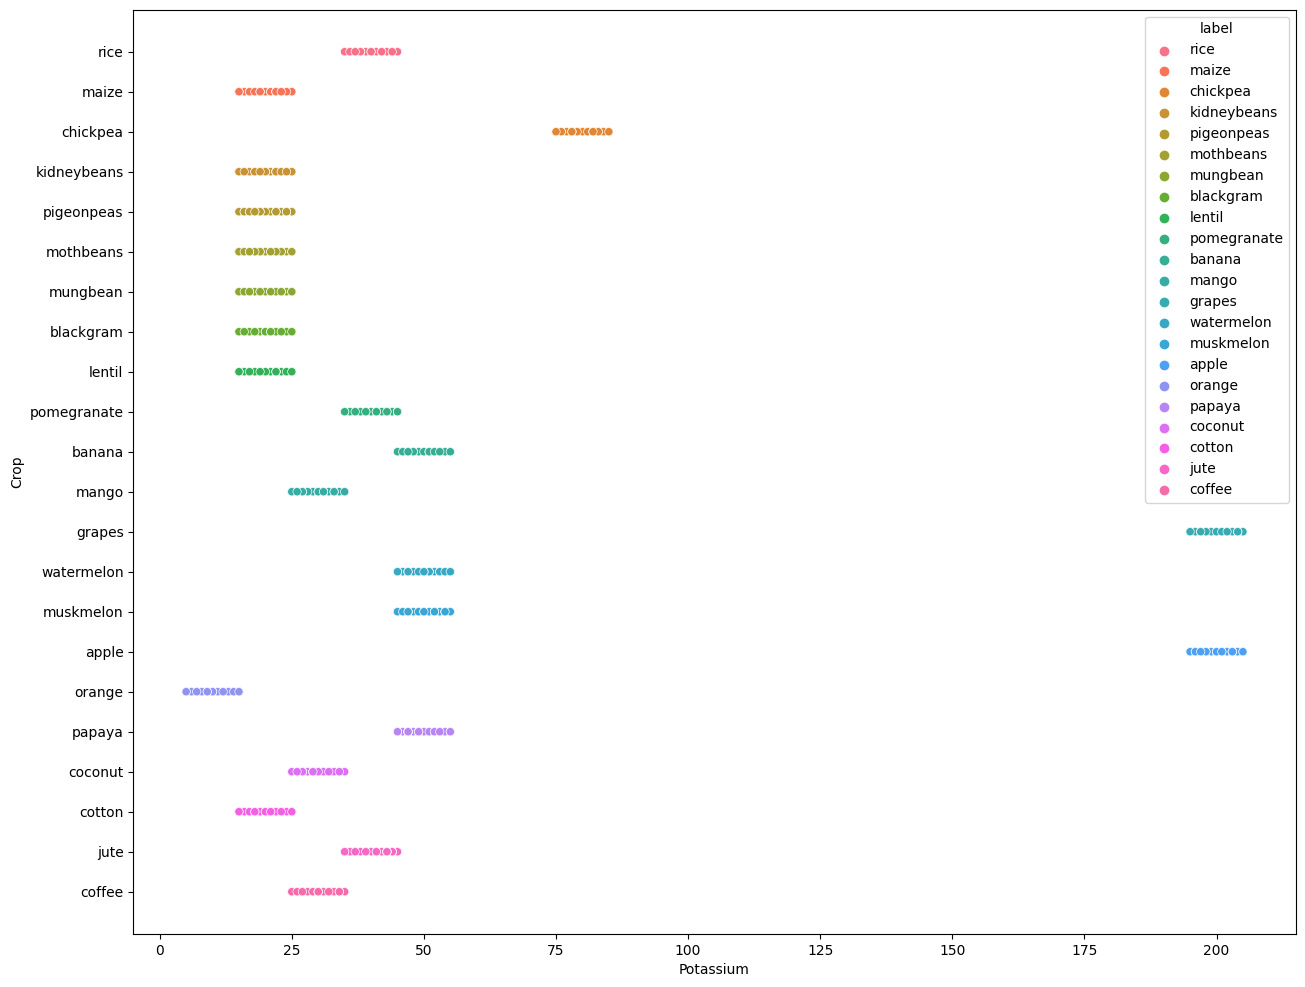

In [12]:
# effect of Potassium on crop

plt.figure(figsize=(15,12))
plt.axes(xlabel="Potassium", ylabel="Crop")
sns.scatterplot(data=dataset, x='K', y='label', hue='label')

<Axes: xlabel='Temperature', ylabel='Crop'>

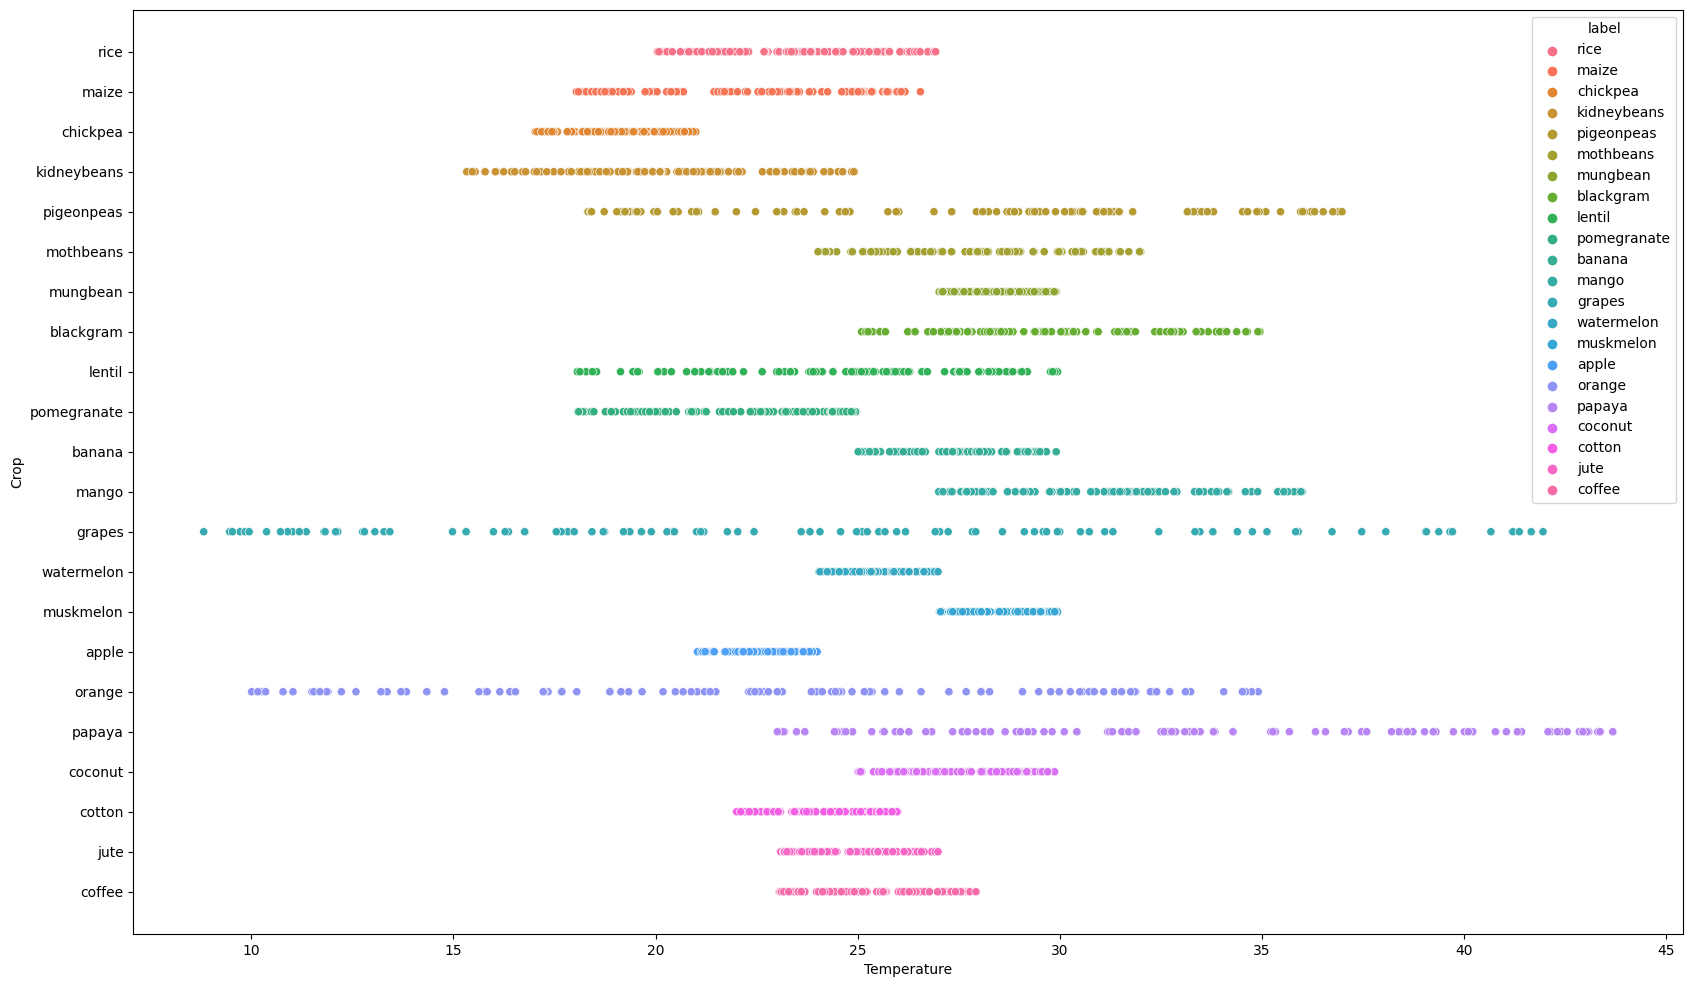

In [13]:
# effect of temperature on crop

plt.figure(figsize=(20,12))
plt.axes(xlabel="Temperature", ylabel="Crop")
sns.scatterplot(data=dataset, x='temperature', y='label', hue='label')

<Axes: xlabel='humidity', ylabel='Crop'>

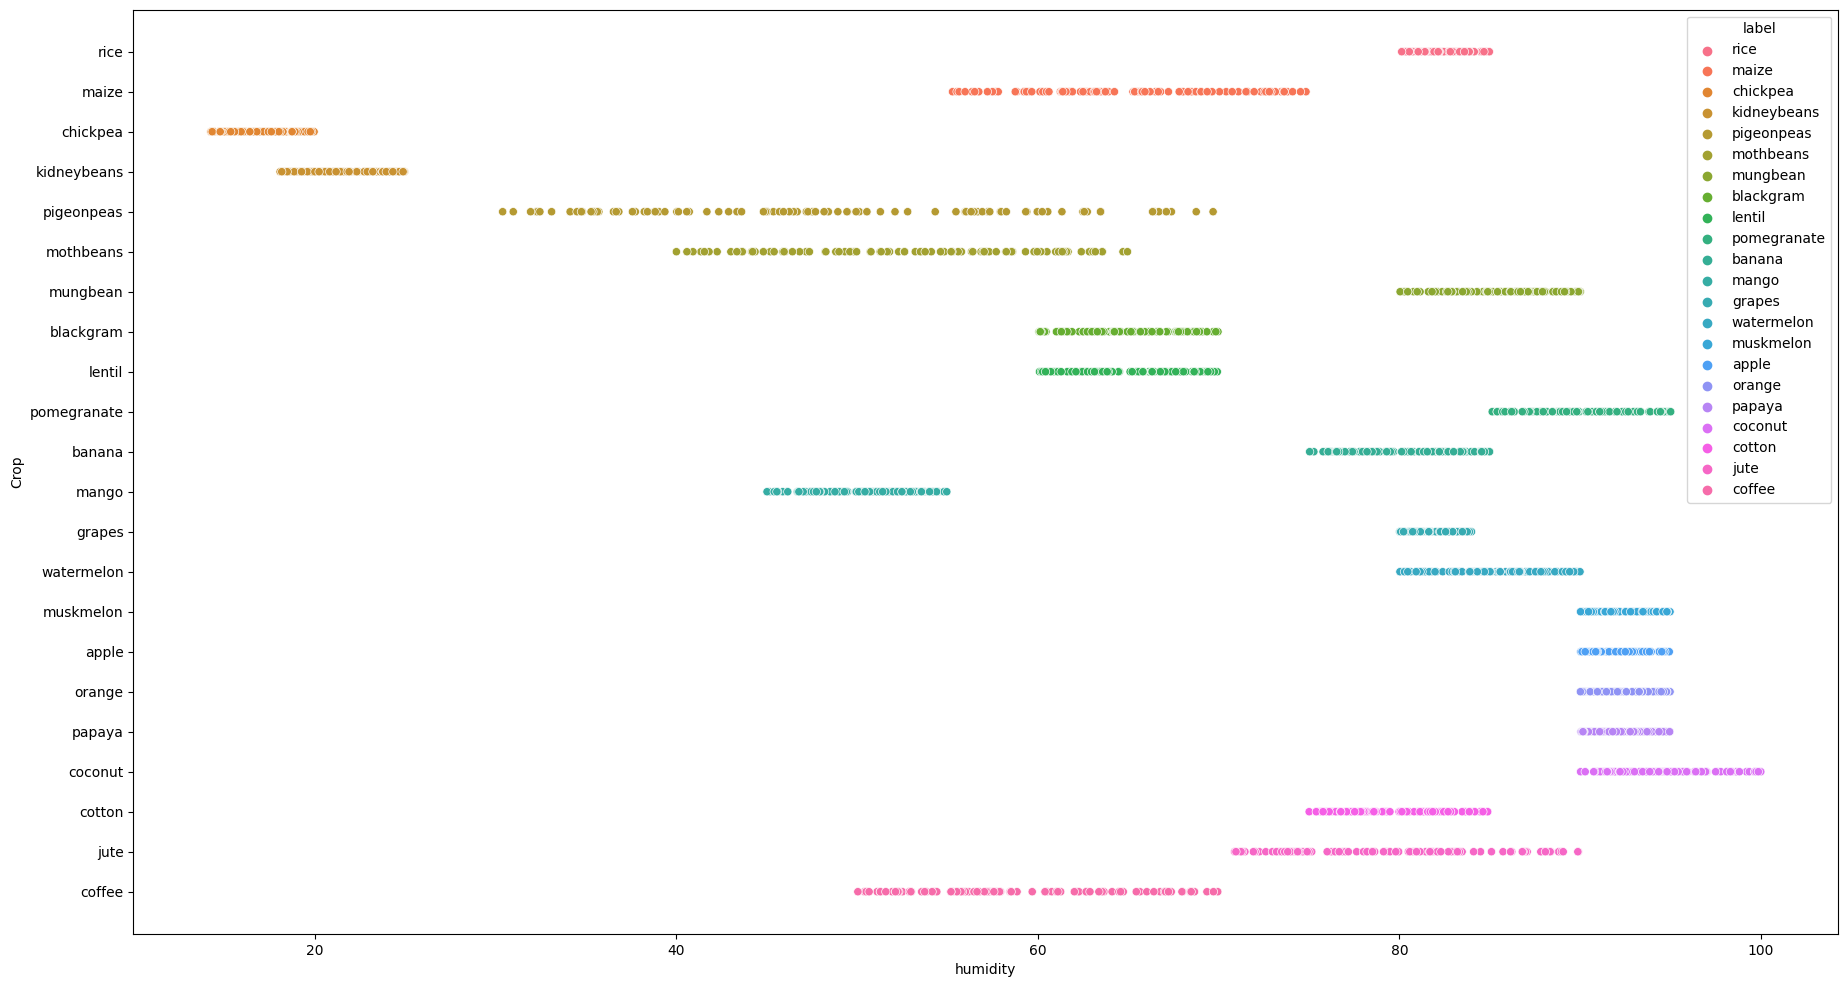

In [14]:
# effect of humidity on crop

plt.figure(figsize=(22,12))
plt.axes(xlabel="humidity", ylabel="Crop")
sns.scatterplot(data=dataset, x='humidity', y='label', hue='label')

<Axes: xlabel='ph', ylabel='Crop'>

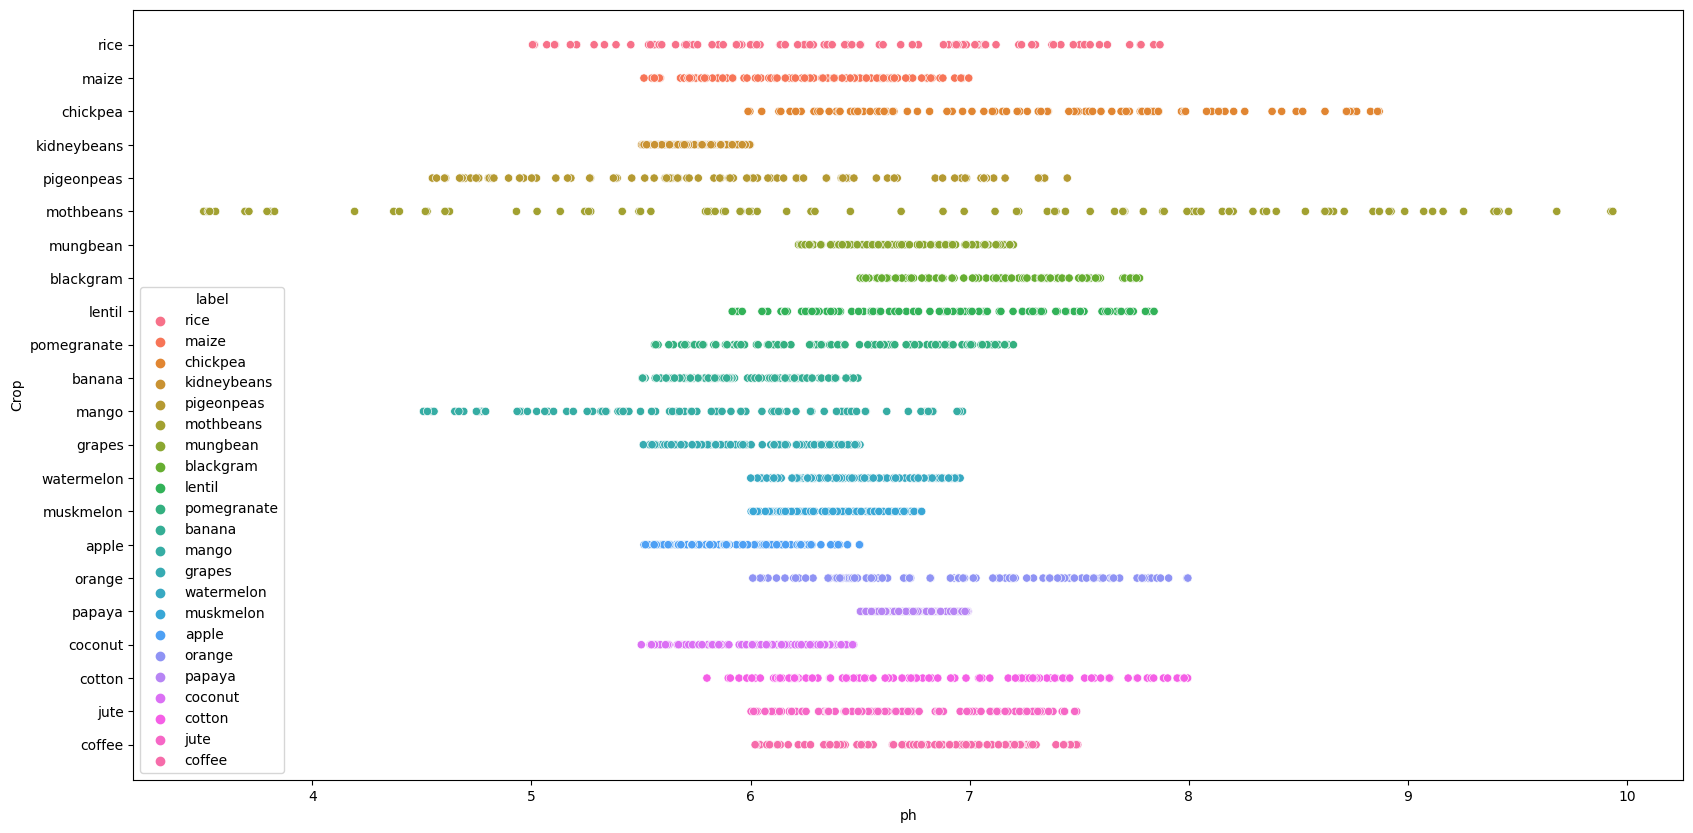

In [15]:
# effect of ph on crop

plt.figure(figsize=(20,10))
plt.axes(xlabel="ph", ylabel="Crop")
sns.scatterplot(data=dataset, x='ph', y='label', hue='label')

<Axes: xlabel='Rainfall', ylabel='Crop'>

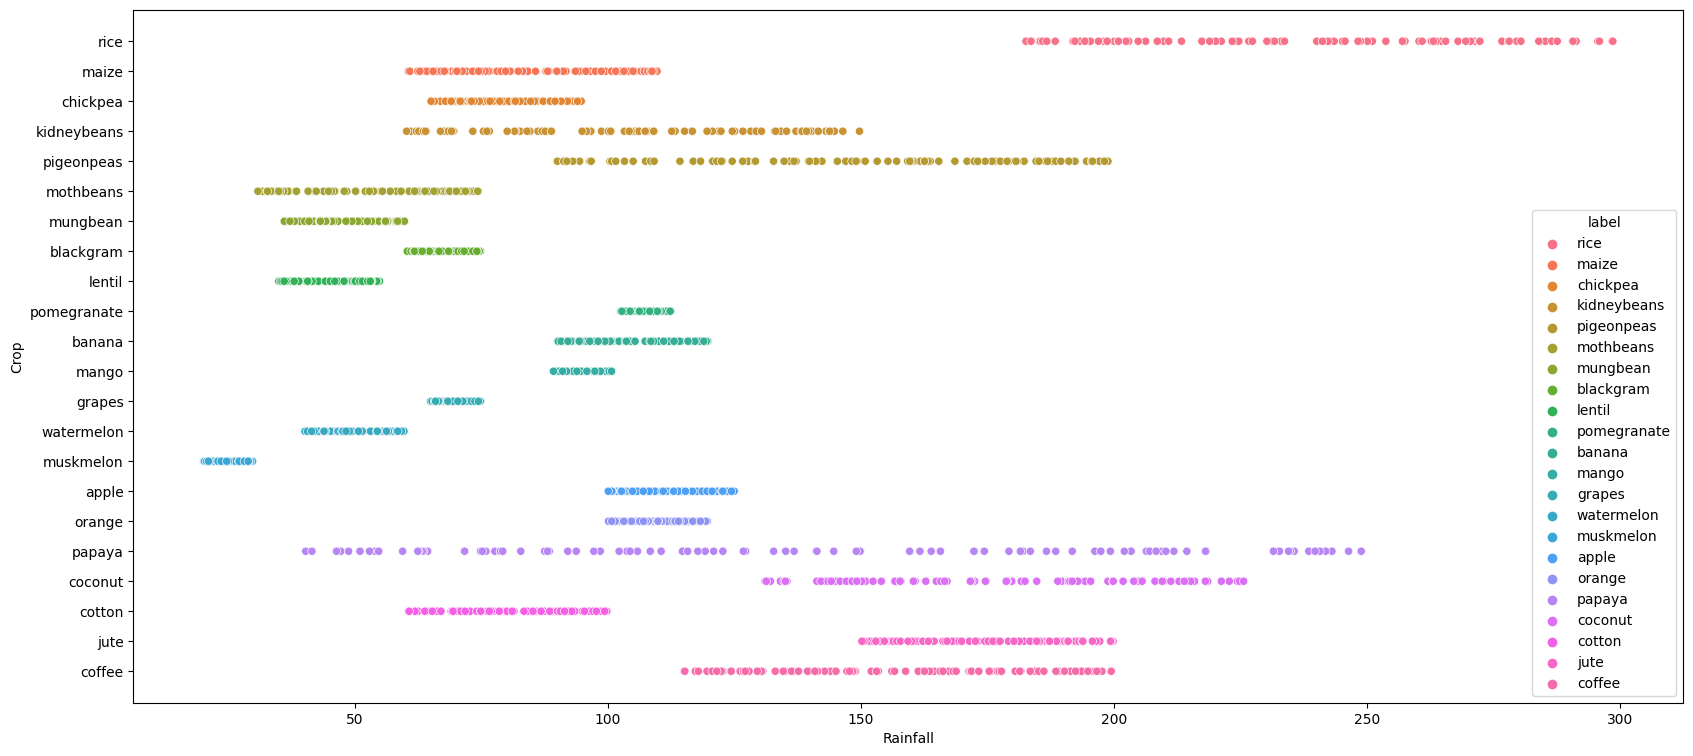

In [16]:
# effect of rainfall on crop

plt.figure(figsize=(20,9))
plt.axes(xlabel="Rainfall", ylabel="Crop")
sns.scatterplot(data=dataset, x='rainfall', y='label', hue='label')

## Data Transformation

In [17]:
dataset

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [18]:
# crop to digit dict 

crop_to_digit = {
    'rice' : 1,
    'maize' : 2,
    'chickpea' : 3,
    'kidneybeans' : 4,
    'pigeonpeas' : 5,
    'mothbeans' : 6,
    'mungbean' : 7,
    'blackgram' : 8,
    'lentil' : 9,
    'pomegranate' : 10,
    'banana' : 11,
    'mango' : 12,
    'grapes' : 13,
    'watermelon' : 14,
    'muskmelon' : 15,
    'apple' : 16,
    'orange' : 17,
    'papaya' : 18,
    'coconut' : 19,
    'cotton' : 20,
    'jute' : 21,
    'coffee' : 22
}

# digit to crop dict 

digit_to_crop = {
     1 : 'rice',
     2 : 'maize',
     3 : 'chickpea',
     4 : 'kidneybeans',
     5 : 'pigeonpeas',
     6 : 'mothbeans',
     7 : 'mungbean',
     8 : 'blackgram',
     9 : 'lentil',
    10 : 'pomegranate',
    11 : 'banana',
    12 : 'mango',
    13 : 'grapes',
    14 : 'watermelon',
    15 : 'muskmelon',
    16 : 'apple',
    17 : 'orange',
    18 : 'papaya',
    19 : 'coconut',
    20 : 'cotton',
    21 : 'jute',
    22 : 'coffee'
}

In [19]:
# Transform label from string to integer

# Fit and transform the 'Category' column
dataset['label'] = dataset['label'].map(crop_to_digit)

dataset

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,22
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,22
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,22
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,22


## Data Analysis

In [20]:
# View basic analysis of columns 

dataset.describe()

,N,P,K,temperature,humidity,ph,rainfall,label
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,11.500000
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,6.345731
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,1.000000
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,6.000000
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,11.500000
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,17.000000
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117,22.000000


In [21]:
# find correlation matrix

corr_matrix = dataset.corr()
corr_matrix

,N,P,K,temperature,humidity,ph,rainfall,label
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020,0.282787
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839,-0.167951
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461,0.143703
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084,0.180571
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423,0.524452
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069,0.052389
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000,0.121486
label,0.282787,-0.167951,0.143703,0.180571,0.524452,0.052389,0.121486,1.000000


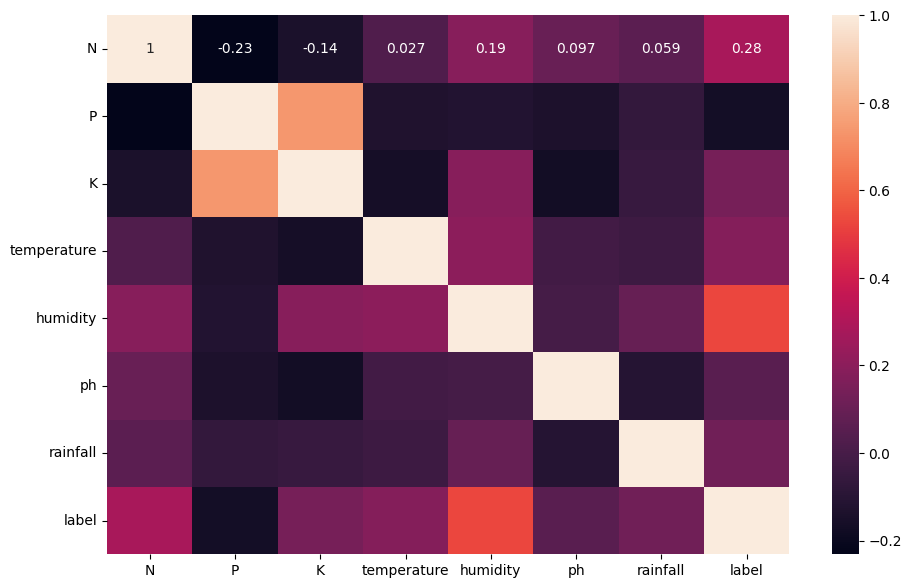

In [22]:
# plotting the heatmap for correlation matrix


plt.figure(figsize=(11, 7))
sns.heatmap(dataset.corr(), annot=True)
plt.show()

## Model Building

In [23]:
# Seperating target variable from features

X = dataset.drop('label',axis=1)
Y = dataset['label']

In [24]:
X.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [25]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [26]:
# Splitting Dataset

from sklearn.model_selection import train_test_split

# Assuming 'X' is your feature matrix and 'y' is your target variable
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)

In [27]:
print("x train size = ",X_train.size)
print("x test size = ",X_test.size)

x train size =  13090
x test size =  2310


In [28]:
X_train

,N,P,K,temperature,humidity,ph,rainfall
621,31,53,16,28.742010,85.816759,6.452006,48.545986
1825,36,27,26,26.584139,95.789231,6.254496,171.626230
1940,108,46,17,24.301800,84.876690,6.932215,65.024787
1232,32,139,198,35.893075,82.668507,6.358187,66.539466
1521,29,128,198,22.440750,92.707851,5.685062,121.497733
...,...,...,...,...,...,...,...
1638,10,5,5,21.213070,91.353492,7.817846,112.983436
1095,108,94,47,27.359116,84.546250,6.387431,90.812505
1130,11,36,31,27.920633,51.779659,6.475449,100.258567
1294,11,124,204,13.429886,80.066340,6.361141,71.400430


In [29]:
print("Types of crop in train data = ", len(Y_train.value_counts()))
print("Types of crop in test data = ", len(Y_test.value_counts()))

Types of crop in train data =  22
Types of crop in test data =  22


#### Check different models

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

In [31]:
for model_name, model in models.items():
    # train model 
    model.fit(X_train, Y_train)
    # predict values for test data 
    Y_predict = model.predict(X_test)
    print(f"Accuracy of {model_name} : {accuracy_score(Y_test,Y_predict)*100}")


Accuracy of Logistic Regression : 93.33333333333333
Accuracy of K-Nearest Neighbors : 96.96969696969697
Accuracy of Decision Tree : 97.57575757575758
Accuracy of Random Forest : 99.39393939393939
Accuracy of Naive Bayes : 99.39393939393939
Accuracy of Support Vector Machine : 96.06060606060606
Accuracy of Bagging : 98.7878787878788
Accuracy of AdaBoost : 14.84848484848485
Accuracy of Gradient Boosting : 98.18181818181819
